In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [2]:

sns.set(rc={'text.usetex' : True})
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [2]:
train_values_df = pd.read_csv('./results/train_values_majority.csv', index_col=0)
train_values_df.head()

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred
0,23100,0.374033,0.294186,0.331781,1,"@thegoodgodabove Holy hell, someone should loc...",0.0,0
1,46230,0.352355,0.295406,0.352239,1,I can't wait to see the snowflake meltdown whe...,0.0,0
2,44792,0.326434,0.305323,0.368243,1,if only my country would have been reduced to ...,0.0,2
3,27207,0.319927,0.330589,0.349485,1,These bitches r crazy bro,1.0,2
4,5915,0.292703,0.340960,0.366337,1,"WOW! Wish u were riding my hard daddy cock, li...",2.0,2


In [3]:
len(train_values_df)

158260

In [4]:
train_df = pd.read_csv('../../data/kennedy/kennedy_train.csv', index_col=0)
train_df.head()

,comment_id,annotator_id,text,hate_speech_score,hatespeech,label,label_vector,message
0,47777,10873,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
1,47777,9099,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
2,47777,7391,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
3,47777,10560,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...
4,47777,6008,Yes indeed. She sort of reminds me of the elde...,-3.9,0.0,0.0,0,Yes indeed. She sort of reminds me of the elde...


In [5]:
len(train_df['comment_id'].unique())

31652

In [6]:
len(train_values_df['text_id'].unique())

31652

In [7]:
len(train_df['annotator_id'].unique())

7912

In [8]:
def get_agreement_score(x):
    mode_result = x.mode()
    mode_count = (x == mode_result.iloc[0]).sum()
    ln = len(x)
    return mode_count/ln

In [9]:
text_df = train_df.groupby('comment_id', as_index=False).agg({'label': get_agreement_score})
text_df.columns = ['comment_id', 'annotator_agreement_factor']
text_df.head()

,comment_id,annotator_agreement_factor
0,1,1.000000
1,2,0.666667
2,3,0.666667
3,4,0.500000
4,5,1.000000


In [10]:
text_df[text_df['comment_id']==4777]

,comment_id,annotator_agreement_factor
3080,4777,0.5


In [11]:
train_values_df = train_values_df.merge(text_df[['comment_id', 'annotator_agreement_factor']], right_on='comment_id', left_on='text_id')
train_values_df.head()

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred,comment_id,annotator_agreement_factor
0,23100,0.374033,0.294186,0.331781,1,"@thegoodgodabove Holy hell, someone should loc...",0.0,0,23100,0.666667
1,23100,0.852134,0.074562,0.073304,2,"@thegoodgodabove Holy hell, someone should loc...",0.0,0,23100,0.666667
2,23100,0.757506,0.090258,0.152235,3,"@thegoodgodabove Holy hell, someone should loc...",0.0,0,23100,0.666667
3,23100,0.548969,0.177572,0.273459,4,"@thegoodgodabove Holy hell, someone should loc...",0.0,0,23100,0.666667
4,23100,0.658198,0.184164,0.157638,5,"@thegoodgodabove Holy hell, someone should loc...",0.0,0,23100,0.666667


In [12]:
len(train_values_df)

158260

In [13]:
train_values_df[train_values_df['comment_id']==4777]

,text_id,label_0,label_1,label_2,epoch_no,text,label,pred,comment_id,annotator_agreement_factor
157810,4777,0.513669,0.124044,0.362287,1,"I am for exterminating Muslim, clitorises won'...",1.0,0,4777,0.5
157811,4777,0.557420,0.091401,0.351178,2,"I am for exterminating Muslim, clitorises won'...",1.0,0,4777,0.5
157812,4777,0.498238,0.203285,0.298477,3,"I am for exterminating Muslim, clitorises won'...",1.0,0,4777,0.5
157813,4777,0.243614,0.158111,0.598275,4,"I am for exterminating Muslim, clitorises won'...",1.0,2,4777,0.5
157814,4777,0.318886,0.320835,0.360279,5,"I am for exterminating Muslim, clitorises won'...",1.0,2,4777,0.5


In [14]:
def get_confidence(label, label_0_mean, label_1_mean, label_2_mean):
    if label == 0:
        return label_0_mean
    elif label == 1:
        return label_1_mean
    else: return label_2_mean
    
def get_variability(label, label_0_std, label_1_std, label_2_std):
    if label == 0:
        return label_0_std
    elif label == 1:
        return label_1_std
    else: return label_2_std

def get_correctness(label, label_0_last, label_1_last, label_2_last):
    if label == 0:
        return label_0_last
    elif label == 1:
        return label_1_last
    else: return label_2_last

In [15]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby('text_id', as_index=False).agg({'text':'first', 'label_0': metrics, 'label_1': metrics, 'label_2': metrics, 'label': 'first', 'pred': 'last', 'annotator_agreement_factor': 'first'})
    agg_df.columns = ['text_id', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label_2_mean', 'label_2_std', 'label_2_last', 'label', 'pred', 'annotator_agreement_factor']
    
    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean, row.label_2_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std, row.label_2_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last, row.label_2_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)
    
    return agg_df

In [16]:
cartography_df = build_cartography_df(train_values_df)
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct
0,1,White people are trash.,0.745260,0.128753,0.886104,0.092564,0.032084,0.065327,0.162176,0.102956,0.048569,0.0,0,1.000000,0.745260,0.128753,0.886104,True
1,2,"You've caught the big gay, it's known to be ai...",0.556444,0.281930,0.175616,0.183405,0.110352,0.333001,0.260152,0.173061,0.491384,2.0,2,0.666667,0.260152,0.173061,0.491384,True
2,3,"I'm not saying you said that, I'm just saying ...",0.617450,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True
3,4,Donald Trump. Yeet myself off a building onto ...,0.508655,0.233640,0.265622,0.168942,0.095517,0.237798,0.322403,0.148581,0.496580,1.0,2,0.500000,0.168942,0.095517,0.237798,False
4,5,Fabrice Fabrice is ostensibly black or black/l...,0.924635,0.071086,0.990208,0.045497,0.037169,0.007382,0.029868,0.034223,0.002410,0.0,0,1.000000,0.924635,0.071086,0.990208,True


In [17]:
cartography_df[cartography_df['text_id']==3]

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct
2,3,"I'm not saying you said that, I'm just saying ...",0.61745,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True


In [18]:
# cartography_df = pd.read_csv('./results/measuring-hate-speech-uc-berk-data-cartography.csv', index_col=0)
# cartography_df['agreement_factor'] = cartography_df['annotator_agreement_factor']
# cartography_df['agreement_factor'] = cartography_df['agreement_factor'].apply(lambda x: 0.6 if x == 0.4 else x)
# cartography_df.head()

In [19]:
def round_agree_factor(agr_factor):
    if agr_factor <= 0.6:
        return 0.6
    elif agr_factor <= 0.8:
        return 0.8
    return 1.0

cartography_df['agreement_factor_rd'] = cartography_df['annotator_agreement_factor'].apply(lambda x: round_agree_factor(x))
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,White people are trash.,0.745260,0.128753,0.886104,0.092564,0.032084,0.065327,0.162176,0.102956,0.048569,0.0,0,1.000000,0.745260,0.128753,0.886104,True,1.0
1,2,"You've caught the big gay, it's known to be ai...",0.556444,0.281930,0.175616,0.183405,0.110352,0.333001,0.260152,0.173061,0.491384,2.0,2,0.666667,0.260152,0.173061,0.491384,True,0.8
2,3,"I'm not saying you said that, I'm just saying ...",0.617450,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True,0.8
3,4,Donald Trump. Yeet myself off a building onto ...,0.508655,0.233640,0.265622,0.168942,0.095517,0.237798,0.322403,0.148581,0.496580,1.0,2,0.500000,0.168942,0.095517,0.237798,False,0.6
4,5,Fabrice Fabrice is ostensibly black or black/l...,0.924635,0.071086,0.990208,0.045497,0.037169,0.007382,0.029868,0.034223,0.002410,0.0,0,1.000000,0.924635,0.071086,0.990208,True,1.0


In [20]:
len(cartography_df)

31652

In [21]:
cartography_df.to_csv('./results/cartography_majority.csv', index=False)

In [3]:
cartography_df = pd.read_csv('./results/cartography_majority.csv')
cartography_df.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,White people are trash.,0.745260,0.128753,0.886104,0.092564,0.032084,0.065327,0.162176,0.102956,0.048569,0.0,0,1.000000,0.745260,0.128753,0.886104,True,1.0
1,2,"You've caught the big gay, it's known to be ai...",0.556444,0.281930,0.175616,0.183405,0.110352,0.333001,0.260152,0.173061,0.491384,2.0,2,0.666667,0.260152,0.173061,0.491384,True,0.8
2,3,"I'm not saying you said that, I'm just saying ...",0.617450,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True,0.8
3,4,Donald Trump. Yeet myself off a building onto ...,0.508655,0.233640,0.265622,0.168942,0.095517,0.237798,0.322403,0.148581,0.496580,1.0,2,0.500000,0.168942,0.095517,0.237798,False,0.6
4,5,Fabrice Fabrice is ostensibly black or black/l...,0.924635,0.071086,0.990208,0.045497,0.037169,0.007382,0.029868,0.034223,0.002410,0.0,0,1.000000,0.924635,0.071086,0.990208,True,1.0


In [4]:
len(cartography_df)

31652

In [ ]:
len(train_values_df)

In [24]:
train_df.comment_id.nunique()

31652

### Useless post this

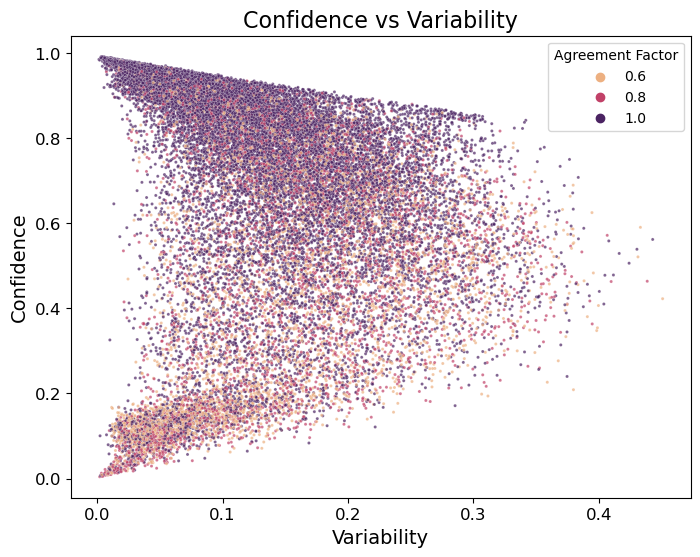

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='agreement_factor_rd', palette='flare', alpha=0.7, s=5)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/conf_vs_var_color_agreement_factor.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6 vs. 0.8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.085e-68 U_stat=8.963e+06
0.8 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.845e+07
0.6 vs. 1.0: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.835e+07


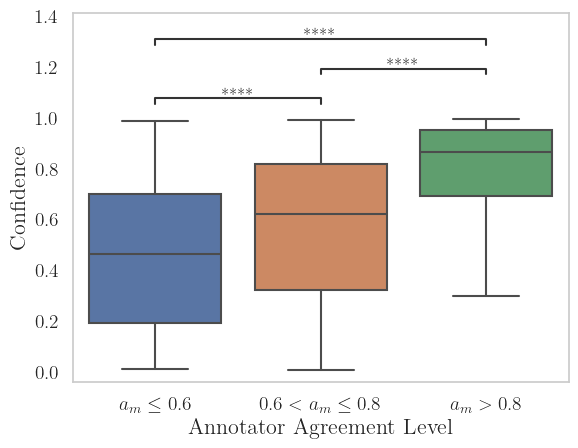

In [6]:
# sns.boxplot(data=cartography_df, x="agreement_factor", y="confidence")
# plt.title("Agreement Factor vs Confidence", fontsize=16)
# plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.savefig("agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", showfliers=False)

pairs=[(0.6, 0.8), (0.8, 1.0), (0.6, 1.0)]

annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence")
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

# plt.title("Agreement Factor vs Confidence", fontsize=16)
csfont = {'fontname':'Times New Roman'}

plt.gca().set_ylabel('Confidence', fontsize=16, **csfont)
plt.gca().set_xlabel('Annotator Agreement Level', fontsize=16, **csfont)
plt.xticks([0, 1, 2], [r'$a_m \leq 0.6$', r'$0.6 < a_m \leq 0.8$', r'$a_m > 0.8$',], fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)
plt.savefig("./plots/majority/kennedy_agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

In [7]:
cartography_df['label_text'] = cartography_df['label'].map({0: 'supportive', 1: 'neutral', 2: 'hate speech'})

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.6_supportive vs. 1.0_supportive: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.241e+06
0.6_neutral vs. 1.0_neutral: Mann-Whitney-Wilcoxon test two-sided, P_val:7.964e-01 U_stat=4.212e+05
0.6_hate speech vs. 1.0_hate speech: Mann-Whitney-Wilcoxon test two-sided, P_val:1.677e-148 U_stat=2.230e+06


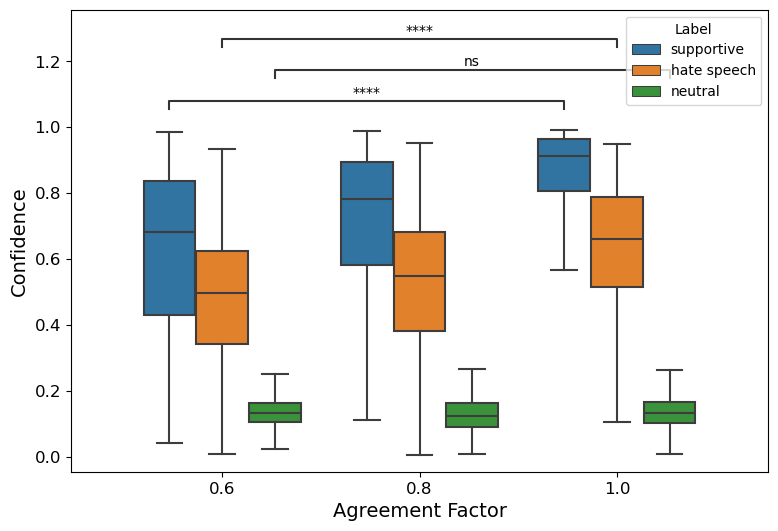

In [44]:
plt.figure(figsize=(9, 6))

ax = sns.boxplot(data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text', showfliers=False, palette='tab10')

pairs=[ ((0.6, 'supportive'), (1.0, 'supportive')), ((0.6, 'neutral'), (1.0, 'neutral')), ((0.6, 'hate speech'), (1.0, 'hate speech'))]



annotator = Annotator(ax, pairs, data=cartography_df, x="agreement_factor_rd", y="confidence", hue='label_text')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title = 'Label', loc='upper right')
plt.savefig("./plots/majority/agr_factor_vs_conf_hue.png", dpi=600, bbox_inches='tight')

<Axes: xlabel='label', ylabel='Count'>

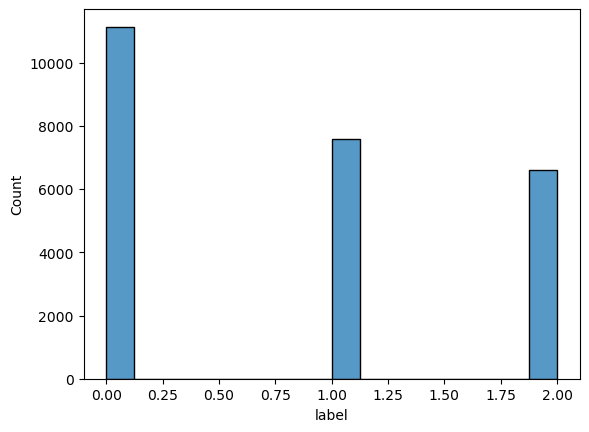

In [53]:
sns.histplot(cartography_df, x='label')

In [8]:
cartography_df['label'].value_counts()

0    15727
1    10562
2     9319
Name: label, dtype: int64

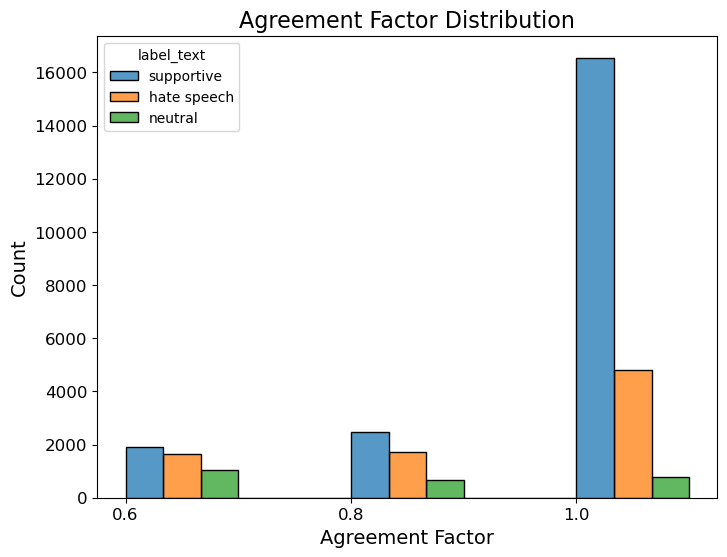

In [33]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=cartography_df, x="agreement_factor_rd", hue='label_text', palette='tab10', multiple='dodge', binwidth=0.1)

plt.title("Agreement Factor Distribution", fontsize=16)
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks([0.6, 0.8, 1.0], fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/agr_factor_hist.png", dpi=600, bbox_inches='tight')

In [4]:
def round_correctness(value):
    return round(value*5)/5
cartography_df['correctness_rd'] = cartography_df['correctness'].apply(lambda x: round_correctness(x))

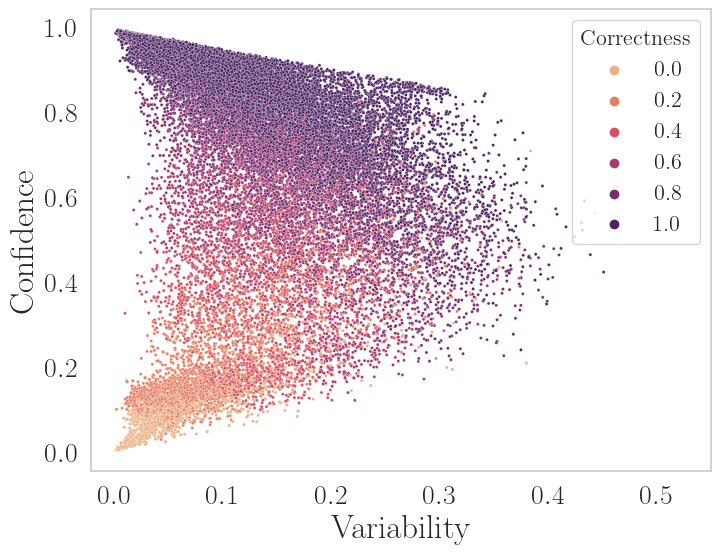

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=cartography_df, x="variability", y="confidence", hue='correctness_rd', palette='flare', s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=24)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=24)

# Turns off grid on the left Axis.
ax.grid(False)

# Turns off grid on the secondary (right) Axis.
plt.gca().set_xlim(right=0.55)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
legend = plt.legend(title='Correctness', loc='upper right', fontsize=16)
plt.setp(legend.get_title(), fontsize=16)
plt.savefig("./plots/majority/kennedy_conf_vs_var_color_correctness.png", dpi=600, bbox_inches='tight')

In [8]:
def get_text_label(label):
    if label == 1:
        return 'Neutral'
    elif label == 2:
        return 'Hate Speech'
    else:
        return 'Supportive'
cartography_df['text_label'] = cartography_df['label'].apply(lambda x: get_text_label(x))

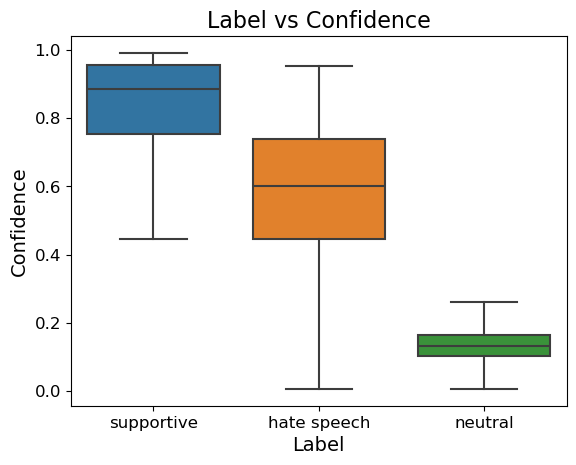

In [40]:
sns.boxplot(data=cartography_df, x="label_text", y="confidence", showfliers=False)
plt.title("Label vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/majority/label_vs_conf.png", dpi=600, bbox_inches='tight')

In [42]:
from scipy.stats import pearsonr

pearsonr(cartography_df['confidence'], cartography_df['agreement_factor_rd'])

PearsonRResult(statistic=0.4509158185053127, pvalue=0.0)